<a href="https://colab.research.google.com/github/rajitakolla/computational_methods/blob/master/clustering_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning: Unsupervised Learning -KMeans

## Data Set: Iris.csv

Title: Iris Plants Database

Updated Sept 21 by C. Blake - Added discrepancy information

Sources:

Creator: RA_ Fisher

Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)

Date: 1988

Relevant Information: This is perhaps the best known database to be found in the pattern recognitionliterature. Fishers paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for
example) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant
One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.
Predicted attribute: class of iris plant.

Number of Instances: 150 (50 in each of three classes)

Number of predictors: 4 numeric, predictive attributes and the class

Attribute Information:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class: Iris Setosa, Iris Versicolour, Iris Virginica

## Import Python Libraries and Modules

In [2]:
# Import Python Libraries: NumPy and Pandas
import pandas as pd
import numpy as np
# Import Libraries & modules for data visualization
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
# Import scikit-Learn module for the algorithm/modeL: K-Means
from sklearn.cluster import KMeans

## Load the data

In [6]:
# Specify location of the dataset
filename = '/content/Iris.csv'
# Load the data into a Pandas DataFrame
df = pd.read_csv(filename)

## Pre-process Dataset

## Clean Data: Find & Mark Missing Values

NOTES:

The following columns cannot contain 0 (zero) values.

i.e., 0 (zero) values are invalid in these columns

SepalLengthCm float64

SepalWidthCm float64

PetalLengthCm float64

PetalWidthCm float64

It they exist, we need to mark them as missing value or numpy.NaN
The code below marks zero values as missing or NaN, count the number of NaN values in each column, get
the dimensions or Shape of the dataset (i.e. number of records/rows x number of variables/columns), get
the data types of all the variables/attributes of the data set. The results shows

1) get several records/rows at the top of the dataset

2) get the first five records

3) get the summary statistics of the numeric variables/attributes of the dataset

In [7]:
# mark zero values as missing or NaN
df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] \
= df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]].replace(0,np.NaN)
# count the number of NaN values in each column
print (df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


## Perform the exploratory data analysis (EDA) on the dataset

#The code below plot histogram for each numeric variable/attribute of the dataset (VIP NOTES: The first
variable ID is also plotted. However the plot should be ignored), density plots (IMPORTANT NOTES: 5
numeric variables --> at least 5 plots --> Layout (2, 3): 2 rows, each row with 3 plots), boxplot, and scatter
plot matrix

In [8]:
# get the dimensions or shape of the dataset
# i.e. number of records / rows X number of variables / columns
print(df.shape)

(150, 6)


In [9]:
#get the data types of all the variables / attributes in the data set
print(df.dtypes)

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [10]:
#return the first five records / rows of the data set
print(df.head(5))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [11]:
#return the summary statistics of the numeric variables / attributes in the data set
print(df.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [12]:
#class distribution i.e. how many records are in each class
print(df.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


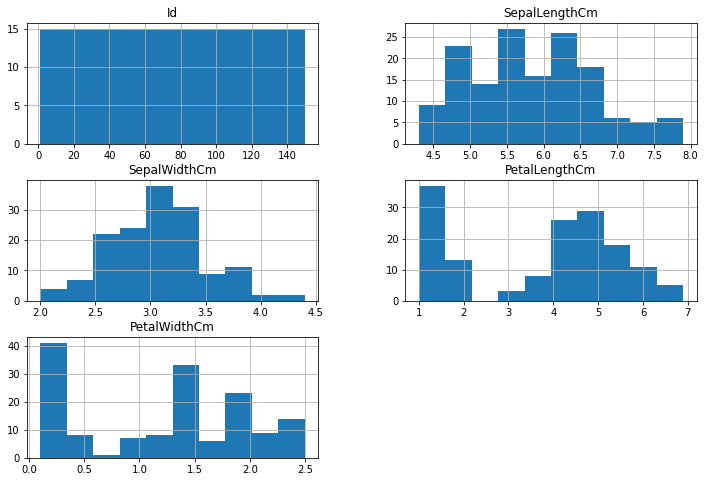

In [13]:
#plot histogram of each numeric variable / attribute in the data set
df.hist(figsize=(12, 8))
pyplot.show()

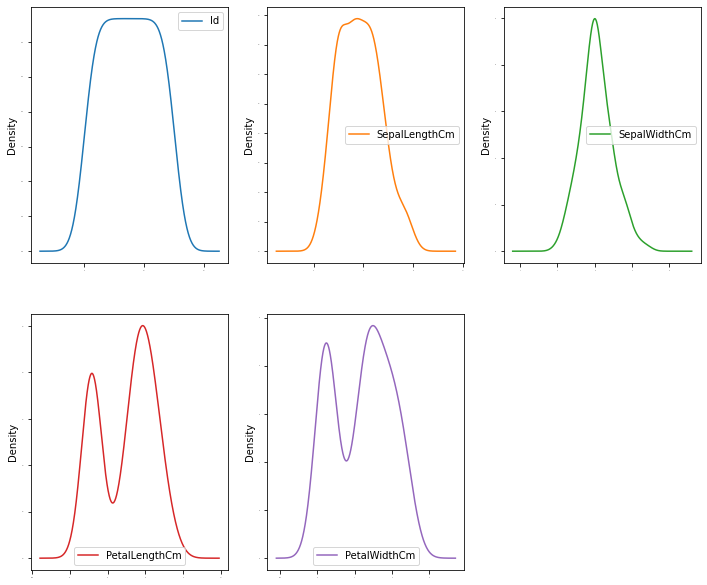

In [14]:

# generate density plots of each numeric variable / attribute in the data set
df.plot(kind='density', subplots=True, layout=(3, 3), sharex=False, legend=True, fontsize=1,
figsize=(12, 16))
pyplot.show()

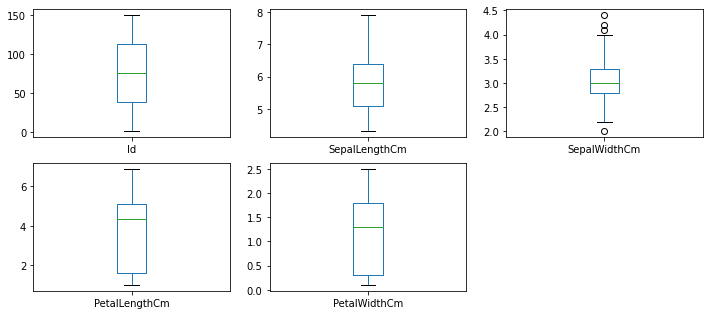

In [15]:
# generate box plots of each numeric variable / attribute in the data set
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, figsize=(12,8))
pyplot.show()

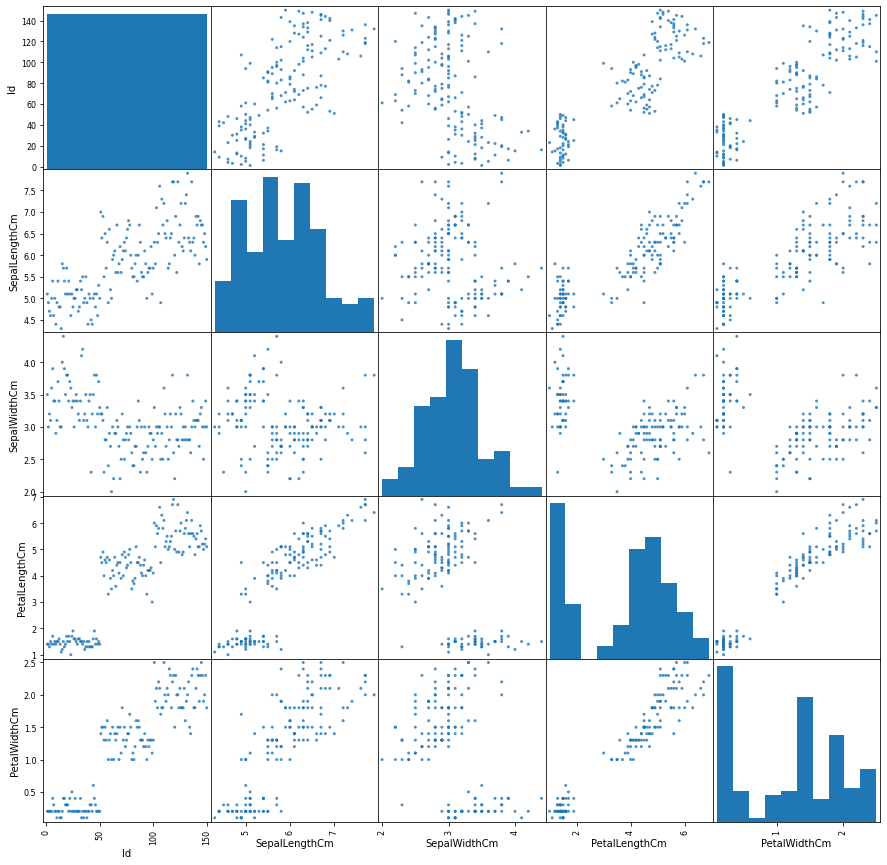

In [16]:
# generate scatter plot matrix of each numeric variable / attribute in the data set
scatter_matrix(df, alpha=0.8, figsize=(15, 15))
pyplot.show()

## Separate Dataset into Input & Output NumPy arrays
### Though we will load the entire set into X and Y input arrays we will only model X

In [17]:
# store dataframe values into a numpy array
array = df.values
# separate array into input and output by slicing

In [18]:
# for X(input) [:, 1:5] --> all the rows, columns from 1 - 4 (5 - 1)
# these are the independent variables or predictors
# we will only use this going forward
X = array[:,1:5]
# for Y(input) [:, 5] --> all the rows, column 5
# this is the value we are trying to predict
# we wont use this going forward
Y = array[:,5]

## Build and Train the Model
The code below will build the Model

In [19]:
# Build the model
# set cluster (K) to 3 to start
model = KMeans(n_clusters=3)
# defaults
KMeans(algorithm='auto', copy_x=True, init= 'k-means++', max_iter=300,
n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto' ,
random_state=None, tol=0.0001, verbose=0)
# Use the model to cluster the input data
model.fit (X)
centroids = model.cluster_centers_
print(centroids)

[[5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [20]:
cluster_labels = model.labels_[::10]
print (cluster_labels)

[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


In [21]:
cluster_labels = model.labels_
print (cluster_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


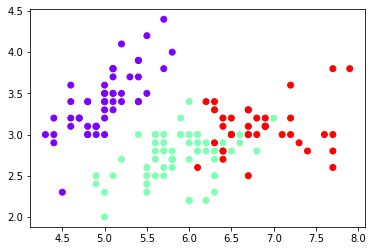

In [22]:
pyplot.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap= 'rainbow' )
pyplot.show ( )

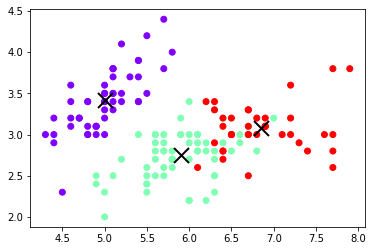

In [23]:
# plot the data points with centroids
# plot using first and second variables of the vector
pyplot.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap= 'rainbow')
lines = pyplot.plot(centroids[0,0],centroids[0,1], 'kx', color= 'black')
pyplot.setp (lines, ms=15.0)
pyplot.setp(lines, mew=2.0)
lines = pyplot.plot(centroids[1,0],centroids[1,1], 'kx', color= 'black')
pyplot.setp (lines, ms=15.0)
pyplot.setp(lines, mew=2.0)
lines = pyplot.plot(centroids[2,0],centroids[2,1], 'kx', color= 'black')
pyplot.setp (lines, ms=15.0)
pyplot.setp(lines, mew=2.0)
pyplot.show ()

Which centroid represents which vector?
We're using the the first and second variables of the vector - pyplot.scatter(X[:, 0], X[:, 1]
The overlaps indicate we may need to introduce a 3rd dimension to our plot - this is a projected
visualization (2 dim)

## Classify/Predict Model
We have trained the model
Let's use the trained model to predict/classify the flower type of a new record
i.e. either Iris Setosa, or Iris Versicolor, or Iris Virginica
The new record has the following predictors:

sepal length in cm = 5.3
sepal Width in cm = 3.0
petal length in cm = 4.5
petal width in cm 1.5

In [24]:
model.predict([[5.3, 3.0, 4.5, 1.5]])

array([1], dtype=int32)